# Load Libraries

In [ ]:
# %load src/preparation.py
import pandas as pd
import numpy as np
import csv
import urllib.request
import json
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

'''
df_full_ipo_date_97_to_19_silicon_valley - This is the data that I scraped from the NASDAQ website that lists all the
IPO's in Silicon Valley betnween 1997 and 2019/04. I will need to add updated IPO results if any new IPO's are announced
but for right now this is static --> REAL TIME WAY TO UPDATE WHEN NEW IPOS ARE ANNOUNCED
zip_all_census_data_silicon_valley - census data from all cities and beaureaus -- that holds econometric stats but also 
race, sex, and age stats about each zipcode
df_all_home_by_zip_silicon_valley - All home prices from 1996 to 2019
'''

def load_real_estate_data():

	'''
	data processing to only view california real estate data

	df_median_all_home_price_by_zip = pd.read_csv('data/raw/Zip_MedianListingPrice_AllHomes.csv',  encoding="ISO-8859-1")
	df_single_family_residence_by_zip = pd.read_csv('data/raw/Zip_Zhvi_SingleFamilyResidence.csv',  encoding="ISO-8859-1")

	df_median_all_home_price_by_zip_california = df_median_all_home_price_by_zip[df_median_all_home_price_by_zip['State']=='CA']
	df_single_family_residence_by_zip_california = df_single_family_residence_by_zip.loc[df_single_family_residence_by_zip['State']=='CA']

	df_sale_counts_by_zip = pd.read_csv('data/raw/Sale_Counts_Zip.csv', encoding="ISO-8859-1")
	df_sale_counts_by_zip_california = df_sale_counts_by_zip.loc[df_sale_counts_by_zip['StateName']=='California']
	'''
	
	df_all_home_by_zip = pd.read_csv('data/raw/Zip_Zhvi_AllHomes.csv',  encoding="ISO-8859-1")

	df_all_home_by_zip_california = df_all_home_by_zip.loc[df_all_home_by_zip['State']=='CA']

def load_IPO_data():
	# data processing to load all IPO Data between 1997 and present data. This data has been scraped using code from src/web_scrapers.py
	df_full_ipo_date_97_to_19 = pd.read_csv('data/processed/1997-04_2019_full_ipo_data.csv',encoding="ISO-8859-1")

	df_ritter_ipo_data_97_to_19 = pd.read_csv('data/raw/ipo_ritter_data.csv',encoding="ISO-8859-1")


def load_census_data():
	'''
	data processing of census data to create demographics by zip code
	'''
	zip_census_data = pd.read_csv('data/raw/zip_census_bureau_economic_characteristics_2017.csv',encoding="ISO-8859-1")
	zip_census_age_race_data = pd.read_csv('data/raw/zip_census_bureau_age_race_2017.csv',encoding="ISO-8859-1")

def add_zipcodes(filename):
    with open(filename, 'r', encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        your_list = list(reader)
        for z in range(0, len(your_list)):
            zipcodes[your_list[z][0]]= [],[]
            zip_list.append(your_list[z][0])

def load_zipcode_data():
	'''
	creating list and dictionary for storing all the zipcodes in silicon valley + san Francisco
	'''

	zipcodes = {} # structured with within 5, 10 miles from another zipcode
	zip_list=[]

	with open('data/raw/Santa_Clara_County_Zipcodes.csv', 'r', encoding='utf-8-sig') as f:
	    reader = csv.reader(f)
	    your_list = list(reader)
	for z in range(0, len(your_list)):
	    zipcodes[your_list[z][0]]= [],[]
	    zip_list.append(your_list[z][0])
	    
	with open('data/raw/San_Mateo_County_Zipcodes.csv', 'r', encoding='utf-8-sig') as f:
	    reader = csv.reader(f)
	    your_list = list(reader)
	for z in range(0, len(your_list)):
	    zipcodes[your_list[z][0]]= [],[]
	    zip_list.append(your_list[z][0])
	    
	with open('data/raw/San_Francisco_County_Zipcodes.csv', 'r', encoding='utf-8-sig') as f:
	    reader = csv.reader(f)
	    your_list = list(reader)
	for z in range(0, len(your_list)):
	    zipcodes[your_list[z][0]]= [],[]
	    zip_list.append(your_list[z][0])
	    
	with open('data/raw/Alameda_County_Zipcodes.csv', 'r', encoding='utf-8-sig') as f:
	    reader = csv.reader(f)
	    your_list = list(reader)
	for z in range(0, len(your_list)):
	    zipcodes[your_list[z][0]]= [],[]
	    zip_list.append(your_list[z][0])

	return zipcodes, ziplist

def wrangle_real_estate_data():
	'''
	#type wrangling of all pandas series in each dataframe

	Dataframes not being used
	df_single_family_residence_by_zip_silicon_valley = df_single_family_residence_by_zip_california[df_single_family_residence_by_zip_california['RegionName'].isin(zip_list)]
	df_median_all_home_price_by_zip_silicon_valley = df_median_all_home_price_by_zip_california[df_median_all_home_price_by_zip_california['RegionName'].isin(zip_list)]


	df_sale_counts_by_zip_california["RegionID"] = df_sale_counts_by_zip_california["RegionID"].astype(dtype=np.int64)
	df_sale_counts_by_zip_california['StateName'] = df_sale_counts_by_zip_california['StateName'].astype('str')

	df_sale_counts_by_zip_silicon_valley = df_sale_counts_by_zip_california[df_sale_counts_by_zip_california['RegionName'].isin(zip_list)]
	df_sale_counts_by_zip_silicon_valley = df_sale_counts_by_zip_silicon_valley.drop(['RegionID','StateName','SizeRank', 'seasAdj'], axis=1)

	'''

	df_all_home_by_zip_silicon_valley = df_all_home_by_zip_california[df_all_home_by_zip_california['RegionName'].isin(zip_list)]
	df_all_home_by_zip_silicon_valley = df_all_home_by_zip_silicon_valley.drop(['City', 'RegionID','State','Metro','CountyName', 'SizeRank'], axis=1)

def wrangle_IPO_data():
	df_full_ipo_date_97_to_19['Date Filed'] =  pd.to_datetime(df_full_ipo_date_97_to_19['Date Filed'], errors='coerce', format='%m/%d/%Y')
	df_full_ipo_date_97_to_19['Lockup Expiration Date'] =  pd.to_datetime(df_full_ipo_date_97_to_19['Lockup Expiration Date'], errors='coerce', format='%m/%d/%Y')

	df_full_ipo_date_97_to_19_silicon_valley = df_full_ipo_date_97_to_19[df_full_ipo_date_97_to_19['Zipcode'].isin(zip_list)]

	df_full_ipo_date_97_to_19_silicon_valley = df_full_ipo_date_97_to_19_silicon_valley.drop(['Lockup Expiration Date', 'Lockup Period'], axis=1)

	# causing warning -- issues with grabbing the 180, but all lockup periods here are 180
	df_full_ipo_date_97_to_19_silicon_valley['Lockup Expiration Date'] = df_full_ipo_date_97_to_19_silicon_valley['Date Filed']+ timedelta(days=180)

def wrangle_census_data():
	'''
	data wrangling of census data
	'''

	zip_census_data.rename(columns = {'Id2':'Zipcode'}, inplace=True)
	zip_census_data.rename(columns = {'Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate':'Unemployment Rate'}, inplace=True)
	zip_census_data.rename(columns = {'Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Less than $10,000':'l10000'}, inplace=True)
	zip_census_data.rename(columns = {'Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $10,000 to $14,999':'l15000'}, inplace=True)
	zip_census_data.rename(columns = {'Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - $15,000 to $24,999':'l25000'}, inplace=True)
	zip_census_data.rename(columns = {'Estimate; COMMUTING TO WORK - Mean travel time to work (minutes)':'Mean Travel Time to Work Estimate (minutes)'}, inplace=True)
	zip_census_data.rename(columns = {'Percent; INCOME AND BENEFITS (IN 2017| INFLATION-ADJUSTED DOLLARS) - Total households - $200,000 or more':'Percent of Households with Income Greater than $200,000'}, inplace=True)
	zip_census_data.rename(columns = {'Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)':'Median Household Income Estimate (dollars)'}, inplace=True)
	zip_census_data.rename(columns = {'Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)':'Mean Household Income Estimate (dollars)'}, inplace=True)
	zip_census_data.rename(columns = {'Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)':'Per Capita Income Estimate (dollars)'}, inplace=True)
	zip_census_data.rename(columns = {'Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage':'Percent of Population with no Health Insurance Coverage'}, inplace=True)
	zip_census_data.rename(columns = {'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people':'Percent of People whose Income in the Past 12 months has been Below Poverty Level'}, inplace=True)


	filtered_census_data_columns = ['Zipcode',
	                               'Unemployment Rate',
	                               'Mean Travel Time to Work Estimate (minutes)',
	                               'Percent of Households with Income Greater than $200,000',
	                               'Median Household Income Estimate (dollars)',
	                               'Mean Household Income Estimate (dollars)',
	                               'Per Capita Income Estimate (dollars)',
	                               'Percent of Population with no Health Insurance Coverage',
	                               'Percent of People whose Income in the Past 12 months has been Below Poverty Level',
	                               'Percent of Households With Income Less Than $24,999']
	zip_census_data['l10000'].replace("-","0.0", regex=True, inplace=True)
	zip_census_data['l10000'].replace("N","0.0", regex=True, inplace=True)
	zip_census_data['l10000'] = zip_census_data['l10000'].astype(float)

	zip_census_data['l15000'].replace("-","0.0", regex=True, inplace=True)
	zip_census_data['l15000'].replace("N","0.0", regex=True, inplace=True)
	zip_census_data['l15000'] = zip_census_data['l15000'].astype(float)

	zip_census_data['l25000'].replace("-","0.0", regex=True, inplace=True)
	zip_census_data['l25000'].replace("N","0.0", regex=True, inplace=True)
	zip_census_data['l25000'] = zip_census_data['l25000'].astype(float)
	zip_census_data["Percent of Households With Income Less Than $24,999"] = zip_census_data['l10000'] + zip_census_data['l15000']+zip_census_data['l25000']
	zip_census_data = zip_census_data.filter(filtered_census_data_columns)

	zip_census_age_race_data.rename(columns = {'Id2':'Zipcode'}, inplace=True)
	zip_census_age_race_data.rename(columns = {'Estimate; SEX AND AGE - Median age (years)':'Median Age'}, inplace=True)
	zip_census_age_race_data.rename(columns = {'Percent; SEX AND AGE - Under 18 years':'Percent of People under 18 years of age'}, inplace=True)
	zip_census_age_race_data.rename(columns = {'Percent; SEX AND AGE - 65 years and over':'Percent of People 65 years and over'}, inplace=True)
	zip_census_age_race_data.rename(columns = {'Percent; SEX AND AGE - 18 years and over - Male':'Percent of Males'}, inplace=True)
	zip_census_age_race_data.rename(columns = {'Percent; SEX AND AGE - 18 years and over - Female':'Percent of Females'}, inplace=True)
	zip_census_age_race_data.rename(columns = {'Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)':'Percent of People who are Hispanic'}, inplace=True)
	zip_census_age_race_data.rename(columns = {'Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - White alone':'Percent of People who are White'}, inplace=True)
	zip_census_age_race_data.rename(columns = {'Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Black or African American alone':'Percent of People who are Black or African American'}, inplace=True)
	zip_census_age_race_data.rename(columns = {'Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Asian alone':'Percent of People who are Asian'}, inplace=True)

	filtered_census_age_race_data_columns = ['Zipcode',
	                               'Median Age',
	                               'Percent of People under 18 years of age',
	                               'Percent of People 65 years and over',
	                               'Percent of Males',
	                               'Percent of Females',
	                               'Percent of People who are Hispanic',
	                               'Percent of People who are White',
	                               'Percent of People who are Black or African American',
	                               'Percent of People who are Asian']
	zip_census_age_race_data = zip_census_age_race_data.filter(filtered_census_age_race_data_columns)

	# filter data to only Silicon Valley + San Francisco Zip Codes
	zip_census_age_race_data_silicon_valley = zip_census_age_race_data[zip_census_age_race_data['Zipcode'].isin(zip_list)]
	zip_census_data_silicon_valley = zip_census_data[zip_census_data['Zipcode'].isin(zip_list)]

def update_series_headers_real_estate():
	'''
	run before joining dataframes so keys match

	df_sale_counts_by_zip_silicon_valley.columns = df_sale_counts_by_zip_silicon_valley.columns.str.replace('Sales Counts ', '')
	df_sale_counts_by_zip_silicon_valley = df_sale_counts_by_zip_silicon_valley.add_prefix('Sales Counts ')
	df_sale_counts_by_zip_silicon_valley.rename(columns = {'Sales Counts RegionName':'Zipcode'}, inplace=True)

	'''
	df_all_home_by_zip_silicon_valley.columns = df_all_home_by_zip_silicon_valley.columns.str.replace('All Homes ', '')
	df_all_home_by_zip_silicon_valley = df_all_home_by_zip_silicon_valley.add_prefix('All Homes ')
	df_all_home_by_zip_silicon_valley.rename(columns = {'All Homes RegionName':'Zipcode'}, inplace=True)


def join_census_data():
	'''

	'''		
	zip_all_census_data_silicon_valley = zip_census_age_race_data_silicon_valley.set_index('Zipcode').join(zip_census_data_silicon_valley.set_index('Zipcode'))

def join_all_zipcode_data():
	'''
	df_zip_all_joined_data = pd.merge(df_zip_all_joined_data, df_sale_counts_by_zip_silicon_valley, on='Zipcode', how='inner')

	'''

	df_zip_all_joined_data = pd.merge(zip_all_census_data_silicon_valley, df_all_home_by_zip_silicon_valley, on='Zipcode', how='inner')

	df_zip_all_joined_data = df_zip_all_joined_data.replace(['\+'], [''], regex=True)
	df_zip_all_joined_data = df_zip_all_joined_data.replace(['\,'], [''], regex=True)

	zip_df_columns_list =  list(df_zip_all_joined_data.columns.values)




def update_series_headers_ipo_data():
	'''
	run before joining ipo data
	wrangling ritter data
	'''
	df_ritter_ipo_data_97_to_19.rename(columns = {'Ticker':'Symbol'}, inplace=True)

	df_ritter_ipo_data_97_to_19["Found"] = df_ritter_ipo_data_97_to_19["Found"].astype(dtype=np.int64)

def join_ipo_data():
	'''

	'''
	df_full_ipo_date_97_to_19_silicon_valley = df_full_ipo_date_97_to_19_silicon_valley.set_index('Symbol').join(df_ritter_ipo_data_97_to_19.set_index('Symbol'), how='left')

	df_full_ipo_date_97_to_19_silicon_valley = df_full_ipo_date_97_to_19_silicon_valley.drop(['IPO Name', 'Offer date','CUSIP','PERM'], axis=1)

	df_full_ipo_date_97_to_19_silicon_valley.drop_duplicates(subset='CIK', keep='first', inplace=True)



def calculate_distance_between_zips(zipcode,min_radius, max_radius):
    # api-endpoint 
    URL_base = "https://api.zip-codes.com/ZipCodesAPI.svc/1.0/FindZipCodesInRadius?zipcode="
  
    URL = URL_base+zipcode+'&minimumradius='+min_radius+'&maximumradius='+max_radius+'&key=DEMOAPIKEY'
    # sending get request and saving the response as response object 
    contents = urllib.request.urlopen(URL).read()
  

    # printing the output 
    zipcodes_nearby =[]
    for i in range(1, len(json.loads(contents)['DataList'])):
        zipcodes_nearby.append(json.loads(contents)['DataList'][i]['Code'])
        
    return zipcodes_nearby

def create_zipcode_distances_dictionary(zipcodes, zip_list):
	'''
	***DONT RUN IF THESE ARE ALREADY CREATED***
	currently stored as data/processed/zipcodes_within_radius.txt
	'''
	for i in range(0, len(zip_list)):
    	zipcodes[zip_list[i]]= calculate_distance_between_zips(zip_list[i], '0','5'), calculate_distance_between_zips(zip_list[i], '5','10')
    return zipcodes

def create_text_file_from_dictionary(filename, dictionary):
	'''
	with open('data/processed/zipcodes_within_radius.txt', 'w') as json_file:
  		json.dump(zipcodes, json_file)
  	'''
  	with open(filename, 'w') as json_file:
  		json.dump(dictionary, json_file)

def export_dataframe_to_dictionary(df,name):
	'''
	export_csv = df_zip_all_joined_data.to_csv ('data/processed/df_zip_all_joined_data.csv', index = True, header=True) 
	export_csv = df_all_home_by_zip_silicon_valley.to_csv ('data/processed/df_all_home_by_zip_silicon_valley.csv', index = True, header=True)
	export_csv = zip_census_data_silicon_valley.to_csv ('data/processed/export_dataframe.csv', index = True, header=True)
	export_csv = df_full_ipo_date_97_to_19_silicon_valley.to_csv ('data/processed/df_full_ipo_date_97_to_19_silicon_valley.csv', index = True, header=True) 

	'''
	filename = 'data/processed/'+name+'.csv'
	export_csv = df.to_csv (filename, index = True, header=True) #Don't forget to add '.csv' at the end of the path

    
def filter_data_by_zipcode_list(zip_list):
	zip_census_data_silicon_valley = zip_census_data[zip_census_data['Zipcode'].isin(zip_list)]
	df_sale_counts_by_zip_silicon_valley = df_sale_counts_by_zip_california[df_sale_counts_by_zip_california['RegionName'].isin(zip_list)]
	df_all_home_by_zip_silicon_valley = df_all_home_by_zip_california[df_all_home_by_zip_california['RegionName'].isin(zip_list)]
	df_single_family_residence_by_zip_silicon_valley = df_single_family_residence_by_zip_california[df_single_family_residence_by_zip_california['RegionName'].isin(zip_list)]
	df_median_all_home_price_by_zip_silicon_valley = df_median_all_home_price_by_zip_california[df_median_all_home_price_by_zip_california['RegionName'].isin(zip_list)]

def create_IPO_an_Zipcode_dataframe():
	if 'Zipcode' in filtered_census_data_columns: 
	    filtered_census_data_columns.remove('Zipcode')
	    
	if 'Zipcode' in filtered_census_age_race_data_columns: 
	    filtered_census_age_race_data_columns.remove('Zipcode')
	ipo_header_list = list(df_full_ipo_date_97_to_19_silicon_valley.columns.values) + filtered_census_data_columns+ filtered_census_age_race_data_columns+ ['All Homes Date Filed', 
	                                                                                      'All Homes Lockup Expiration Date',
	                                                                                      'All Homes 1 Year After Date Filed', 
	                                                                                      'All Homes 2 Years After Date Filed']
    '''
	Distance from IPO   = estimate is .2 if in the same zipcode as IPO
	                    = estimate is 0.5 if not in same zip code as IPO and less than 5 miles from zipcode to IPO
	                    = estimate is 1 if greater than 5 and less than 10 miles from zipcode to IPO
	'''

	new_df_list =[]

	count = 0 
	for index, row in df_full_ipo_date_97_to_19_silicon_valley.iterrows():
	    ipo_zipcode = row['Zipcode']
	    zipcode_row = df_zip_all_joined_data.loc[df_zip_all_joined_data['Zipcode']== int(ipo_zipcode)]
	    headerList = join_IPO_and_Zip_Data(row['Date Filed'], row['Lockup Expiration Date'])
	    data = np.concatenate((np.array(row.values), zipcode_row.filter(headerList).values), axis=None)
	    dictionary = dict(zip(ipo_header_list, data))
	    dictionary['Symbol'] = index
	    dictionary['Distance to IPO'] = .2
	    dictionary['Zipcode for Distance'] = ipo_zipcode
	    new_df_list.append(dictionary)
	    
	    within_5miles = zipcodes[ipo_zipcode][0]
	    within_10miles = zipcodes[ipo_zipcode][1]
	    for i in range(0, len(within_5miles)):
	        zipcode_row = df_zip_all_joined_data.loc[df_zip_all_joined_data['Zipcode']== int(within_5miles[i])]
	        data = np.concatenate((np.array(row.values), zipcode_row.filter(headerList).values), axis=None)
	        dictionary = dict(zip(ipo_header_list, data))
	        dictionary['Symbol'] = index
	        dictionary['Distance to IPO'] = .5
	        dictionary['Zipcode for Distance'] = within_5miles[i]
	        new_df_list.append(dictionary)

	    for j in range(0, len(within_10miles)):
	        zipcode_row = df_zip_all_joined_data.loc[df_zip_all_joined_data['Zipcode']== int(within_10miles[j])]
	        data = np.concatenate((np.array(row.values), zipcode_row.filter(headerList).values), axis=None)
	        dictionary = dict(zip(ipo_header_list, data))
	        dictionary['Symbol'] = index
	        dictionary['Distance to IPO'] = 1
	        dictionary['Zipcode for Distance'] = within_10miles[j]
	        new_df_list.append(dictionary)

	    
	ipo_final_df = pd.DataFrame(new_df_list)
	ipo_final_df.dropna(subset=['Median Age'], how='all', inplace = True)

	return ipo_final_df

def normalize_IPO_an_Zipcode_dataframe():
	normalization_list = ['Offer Amount', 'Number of Employees','Found', 'Median Age',
	 'Percent of People under 18 years of age',
	 'Percent of People 65 years and over',
	 'Percent of Males',
	 'Percent of Females',
	 'Percent of People who are Hispanic',
	 'Percent of People who are White',
	 'Percent of People who are Black or African American',
	 'Percent of People who are Asian',
	 'Unemployment Rate',
	'Mean Travel Time to Work Estimate (minutes)',
	'Percent of Households with Income Greater than $200,000',
	'Median Household Income Estimate (dollars)',
	'Mean Household Income Estimate (dollars)',
	'Per Capita Income Estimate (dollars)',
	'Percent of Population with no Health Insurance Coverage',
	'Percent of People whose Income in the Past 12 months has been Below Poverty Level',
	'Percent of Households With Income Less Than $24,999'
	                     ]
	ipo_final_df = ipo_final_df.replace(['--'], [''], regex=True)
	ipo_final_df= ipo_final_df.replace(r'^\s*$', np.nan, regex=True)
	ipo_final_df = ipo_final_df.replace(['\,'], [''], regex=True)
	ipo_final_df = ipo_final_df.replace(['\+'], [''], regex=True)

	scaler = MinMaxScaler()
	ipo_final_df[normalization_list] = scaler.fit_transform(ipo_final_df[normalization_list])
	return ipo_final_df



def join_IPO_and_Zip_Data(IPO_Date_Filed, IPO_Lockup_Expiration_Date):
    filtered_columns = filtered_census_age_race_data_columns+ filtered_census_data_columns #remove 'zipcode'
    ipo_month_filed = IPO_Date_Filed.month
    ipo_year_filed = IPO_Date_Filed.year
    AllHomes_header_filed = 'All Homes ' +str(ipo_year_filed)+'-'+str(ipo_month_filed).zfill(2)
    #SalesCounts_header_filed = 'Sales Counts ' +str(ipo_year_filed)+'-'+str(ipo_month_filed).zfill(2)
    
    ipo_month = IPO_Lockup_Expiration_Date.month
    ipo_year = IPO_Lockup_Expiration_Date.year
    AllHomes_header_lockup = 'All Homes ' +str(ipo_year)+'-'+str(ipo_month).zfill(2)
    #SalesCounts_header_lockup = 'Sales Counts ' +str(ipo_year)+'-'+str(ipo_month).zfill(2)
    
    AllHomes_header_filed_1_yr = 'All Homes ' +str(int(ipo_year_filed)+1)+'-'+str(ipo_month_filed).zfill(2)
   # SalesCounts_header_filed_1_yr = 'Sales Counts ' +str(int(ipo_year_filed)+1)+'-'+str(ipo_month_filed).zfill(2)
    
    AllHomes_header_filed_2_yr = 'All Homes ' +str(int(ipo_year_filed)+2)+'-'+str(ipo_month_filed).zfill(2)
    #SalesCounts_header_filed_2_yr = 'Sales Counts ' +str(int(ipo_year_filed)+2)+'-'+str(ipo_month_filed).zfill(2)
    
    filtered_columns = filtered_columns + [AllHomes_header_filed,AllHomes_header_lockup,
                                            AllHomes_header_filed_1_yr, 
                                            AllHomes_header_filed_2_yr]
    return filtered_columns                                                                                     








# Load Data

In [53]:
'''
Import Final IPO csv that was created in wrangling.ipynb. Here we have every IPO in Silicon Valley, 
and each zip code in a 10 mile radius from the IPO Zipcode, the demographics of each of those zipcodes, 
economic data of the zipcode and the home prices at the Date Filed Time, the Lockup Date, 1 Year after 
the Date is Filed and 2 years after the date is filed.
'''

ipo_final_df = pd.read_csv('data/processed/ipo_final_df.csv',  encoding="ISO-8859-1")
ipo_final_with_date_filed_home = ipo_final_df.dropna(axis=0, subset=['All Homes Date Filed', 'Number of Employees']) #remove row where if there is any 'NaN' value in column 'A'
ipo_final_with_date_filed_home = ipo_final_with_date_filed_home.drop(columns =['Unnamed: 0','CIK', 'Company Name'])

# Normalize the Data

In [54]:
min_max_normalization_list = ['Found', 'Median Age',
 'Percent of People under 18 years of age',
 'Percent of People 65 years and over',
 'Percent of Males',
 'Percent of Females',
 'Percent of People who are Hispanic',
 'Percent of People who are White',
 'Percent of People who are Black or African American',
 'Percent of People who are Asian',
 'Unemployment Rate',
'Mean Travel Time to Work Estimate (minutes)',
'Percent of Households with Income Greater than $200,000',
'Median Household Income Estimate (dollars)',
'Mean Household Income Estimate (dollars)',
'Per Capita Income Estimate (dollars)',
'Percent of Population with no Health Insurance Coverage',
'Percent of People whose Income in the Past 12 months has been Below Poverty Level',
'Percent of Households With Income Less Than $24,999']

quantile_scaler_normalization_list =['Offer Amount', 'Number of Employees']

scaler_min_max = MinMaxScaler()
ipo_final_with_date_filed_home[min_max_normalization_list] = scaler_min_max.fit_transform(ipo_final_with_date_filed_home[min_max_normalization_list])

scaler_quantile = QuantileTransformer(output_distribution='normal')  
ipo_final_with_date_filed_home[quantile_scaler_normalization_list] = scaler_quantile.fit_transform(ipo_final_with_date_filed_home[quantile_scaler_normalization_list])
ipo_final_with_date_filed_home[quantile_scaler_normalization_list] = scaler_min_max.fit_transform(ipo_final_with_date_filed_home[quantile_scaler_normalization_list])



# Summarize Data

In [55]:
#Shape
ipo_final_with_date_filed_home.shape

(9882, 31)

In [56]:
ipo_final_with_date_filed_home.dtypes

All Homes 1 Year After Date Filed                                                    float64
All Homes 2 Years After Date Filed                                                   float64
All Homes Date Filed                                                                 float64
All Homes Lockup Expiration Date                                                     float64
Date Filed                                                                            object
Distance to IPO                                                                      float64
Found                                                                                float64
Lockup Expiration Date                                                                object
Mean Household Income Estimate (dollars)                                             float64
Mean Travel Time to Work Estimate (minutes)                                          float64
Median Age                                                            

In [57]:
# Predicting Median Price of All Homes in a Zipcode, and strucuturing data to do so.
ipo_final_with_date_filed_home['2 Year Home Value ratio'] = ipo_final_with_date_filed_home['All Homes 2 Years After Date Filed']/ ipo_final_with_date_filed_home['All Homes Date Filed']

# dataset that does not have 'All Homes 2 Years After Date Filed'
df_test_set_2_years = ipo_final_with_date_filed_home[ipo_final_with_date_filed_home['All Homes 2 Years After Date Filed'].isna()]

# dataset that I will use to train the model because it does have 'All Homes 2 Years After Date Filed'
df_train_set_2_years = ipo_final_with_date_filed_home[ipo_final_with_date_filed_home['All Homes 2 Years After Date Filed'].notna()]

In [58]:
train_corr = df_train_set_2_years.select_dtypes(include=[np.number])
train_corr = train_corr.drop(columns =['All Homes 1 Year After Date Filed','All Homes Lockup Expiration Date'])
train_corr.shape

(8396, 27)

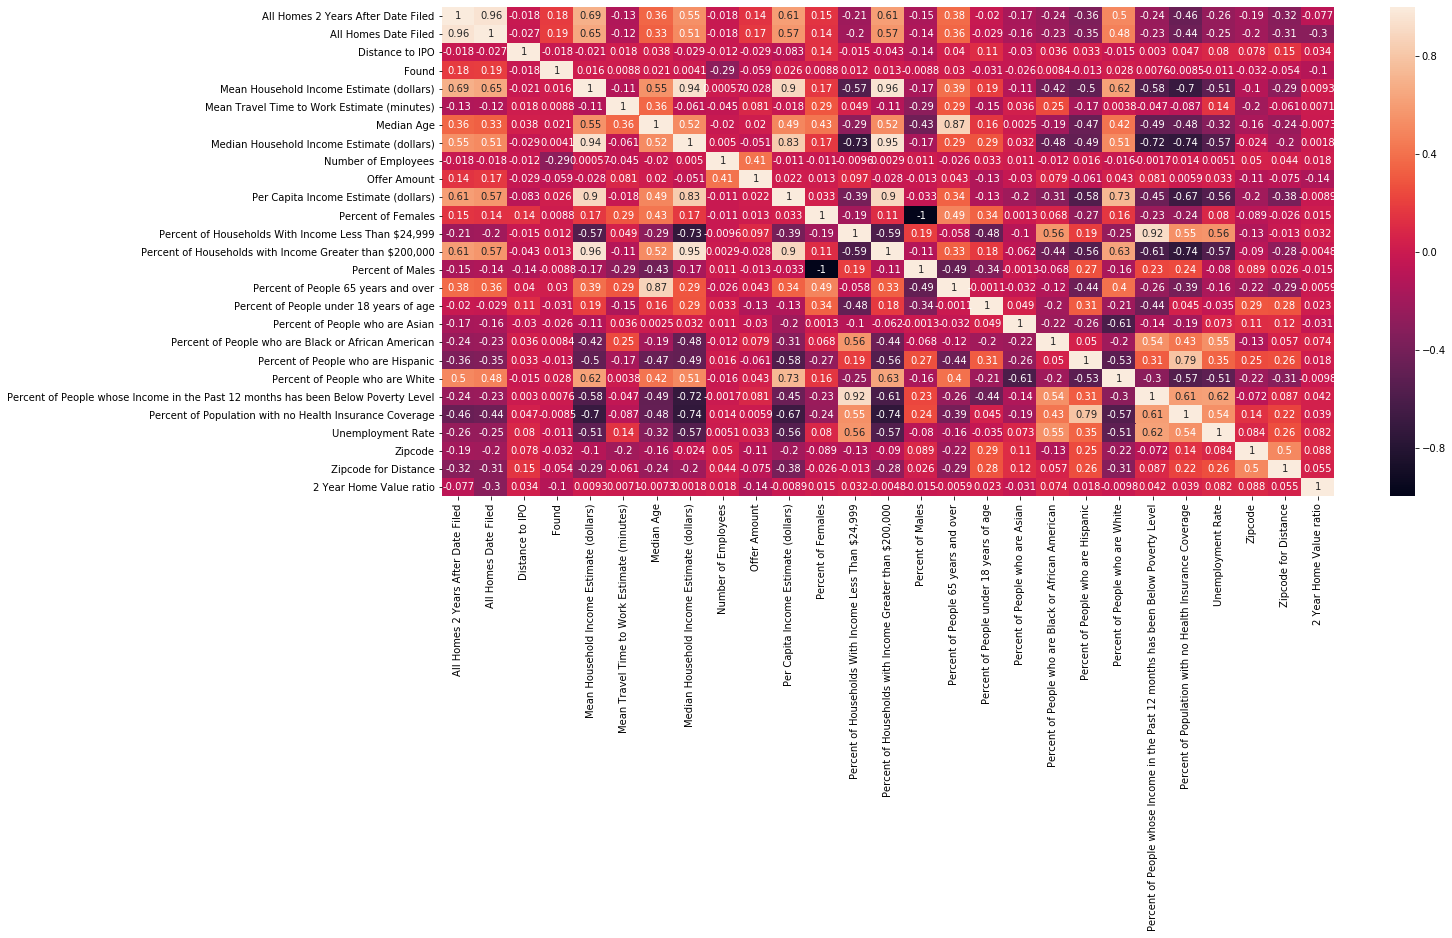

In [59]:
#Correlation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)
plt.show()

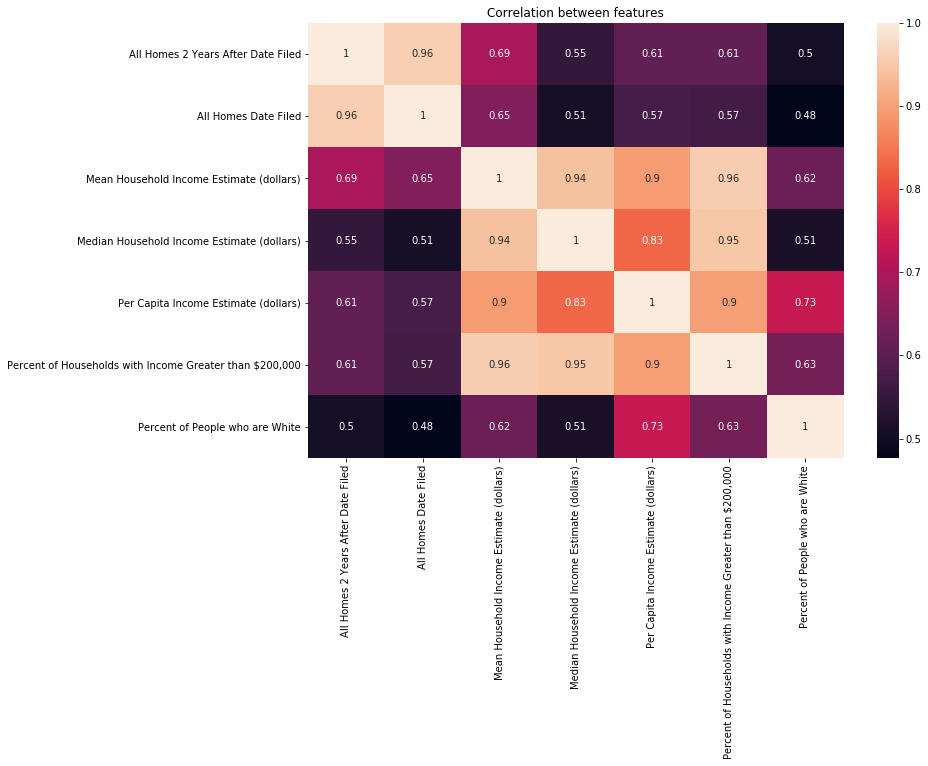

In [60]:
top_feature = corr.index[abs(corr['All Homes 2 Years After Date Filed']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = df_train_set_2_years[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.title('Correlation between features');
plt.show()

From Correlation data, We can confim that variable All Homes Date Filed, Mean Household Income Estimate, Median House Income Estimate, Per Capita Income Estimate, Percent of Households with Income Greater than $200,000, and Percent of People who are White have good corelation with our output variable All Homes 2 Years after Date Filed. These variables we need to consider when we optimze our predictive value

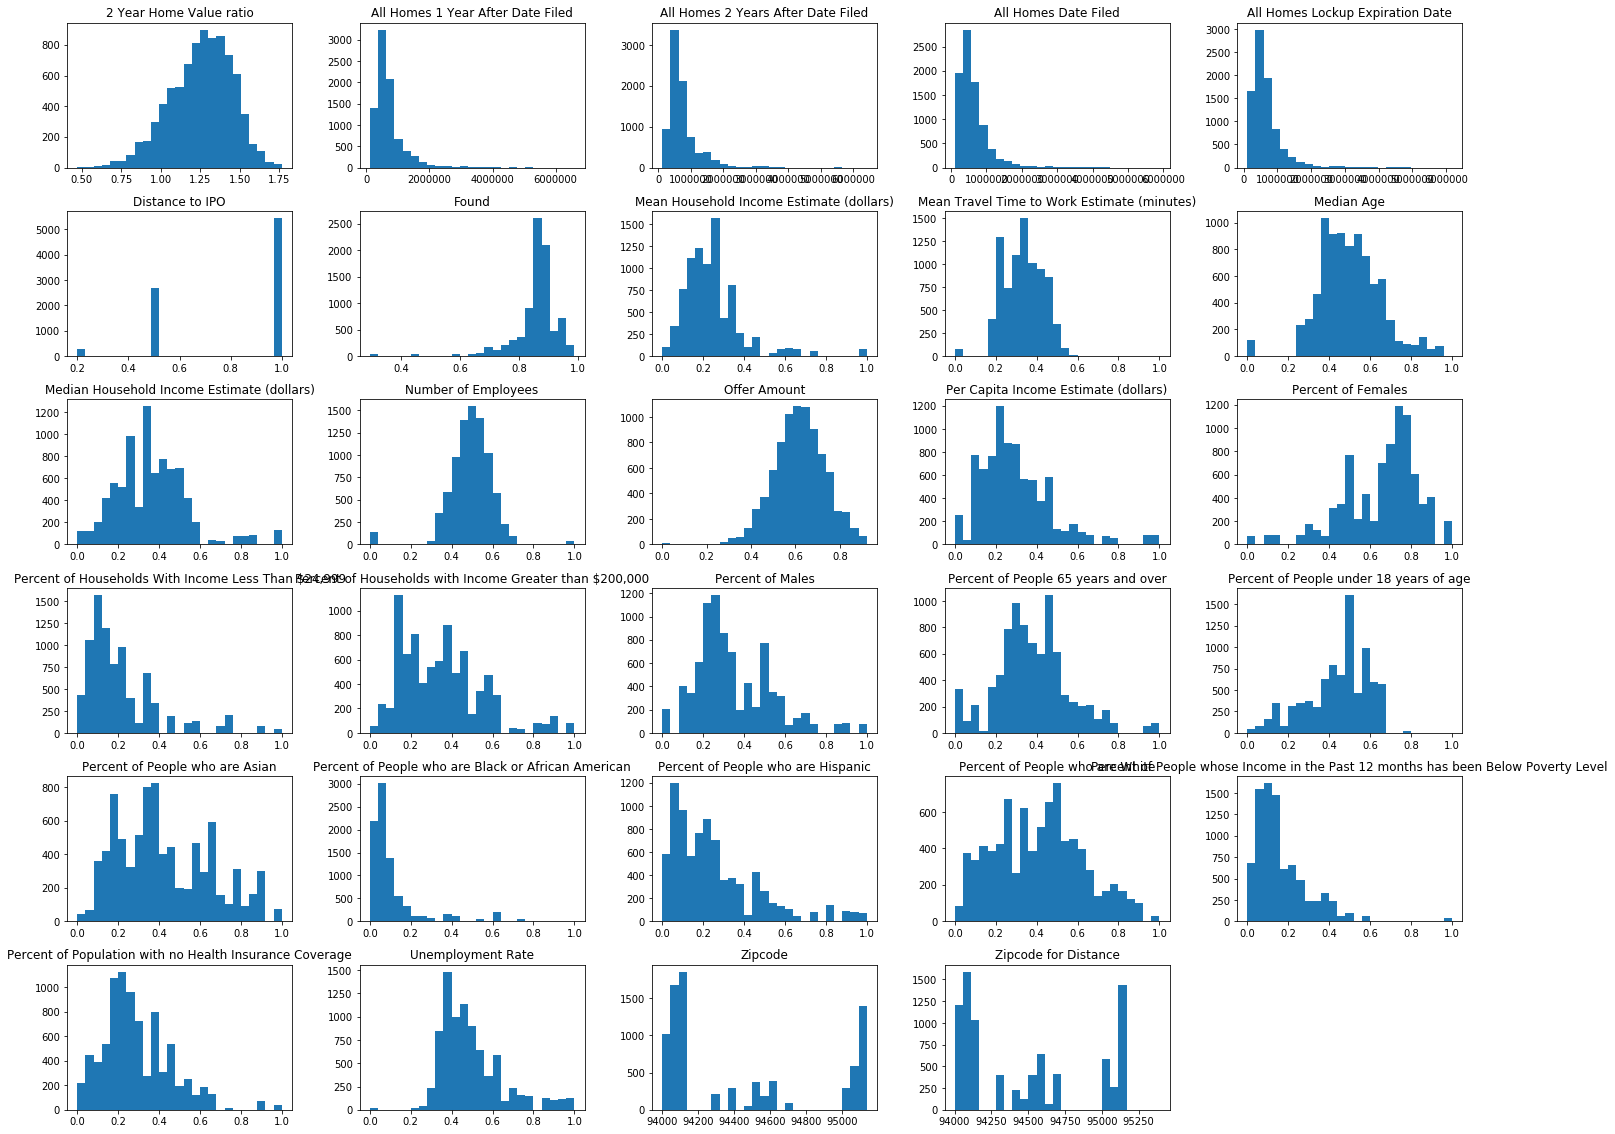

In [61]:
# histograms
df_train_set_2_years.hist(bins=25,figsize=(25,20),grid=False);

Here we can visualize the distributions of each of the features we are using in our model. All values above have been normalized in range [0,1] All parameters above that are used for prediction are now normally distributed.

In [62]:
label_col = 'All Homes 2 Years After Date Filed'
feature_cols = [
       'Distance to IPO', 'Found', 
       'Mean Household Income Estimate (dollars)',
       'Mean Travel Time to Work Estimate (minutes)', 'Median Age',
       'Median Household Income Estimate (dollars)','Offer Amount',
       'Per Capita Income Estimate (dollars)', 'Percent of Females',
       'Percent of Households With Income Less Than $24,999',
       'Percent of Households with Income Greater than $200,000',
       'Percent of Males', 'Percent of People 65 years and over',
       'Percent of People under 18 years of age',
       'Percent of People who are Asian',
       'Percent of People who are Black or African American',
       'Percent of People who are Hispanic',
       'Percent of People who are White',
       'Percent of People whose Income in the Past 12 months has been Below Poverty Level',
       'Percent of Population with no Health Insurance Coverage',
       'Unemployment Rate','All Homes Date Filed', 'Zipcode', 'Zipcode for Distance', 'Number of Employees']
df_train_set_2_years.head()

,All Homes 1 Year After Date Filed,All Homes 2 Years After Date Filed,All Homes Date Filed,All Homes Lockup Expiration Date,Date Filed,Distance to IPO,Found,Lockup Expiration Date,Mean Household Income Estimate (dollars),Mean Travel Time to Work Estimate (minutes),...,Percent of People who are Black or African American,Percent of People who are Hispanic,Percent of People who are White,Percent of People whose Income in the Past 12 months has been Below Poverty Level,Percent of Population with no Health Insurance Coverage,Symbol,Unemployment Rate,Zipcode,Zipcode for Distance,2 Year Home Value ratio
0,481900.0,487400.0,359400.0,420100.0,1999-08-16,0.2,0.585366,2000-02-12,0.219723,0.241784,...,0.066210,0.191718,0.308051,0.058468,0.184358,A,0.416667,95051,95051,1.356149
1,467300.0,461900.0,348200.0,407300.0,1999-08-16,0.5,0.585366,2000-02-12,0.145880,0.225352,...,0.082192,0.320552,0.462077,0.264113,0.379888,A,0.351852,95051,95050,1.326536
2,698300.0,671100.0,520400.0,608400.0,1999-08-16,0.5,0.585366,2000-02-12,0.326772,0.227700,...,0.029680,0.064417,0.415403,0.060484,0.162011,A,0.361111,95051,94087,1.289585
3,562500.0,563000.0,417500.0,488600.0,1999-08-16,0.5,0.585366,2000-02-12,0.242265,0.265258,...,0.034247,0.225460,0.344224,0.098790,0.229050,A,0.574074,95051,94086,1.348503
4,484800.0,498900.0,389000.0,437100.0,1999-08-16,0.5,0.585366,2000-02-12,0.160878,0.239437,...,0.132420,0.384969,0.397900,0.219758,0.446927,A,0.638889,95051,95117,1.282519


All Homes 2 Years After Date Filed deviates from the Normal Distribution and is Right Skewed.

Visualizations of the Residual Plots for Each Variable

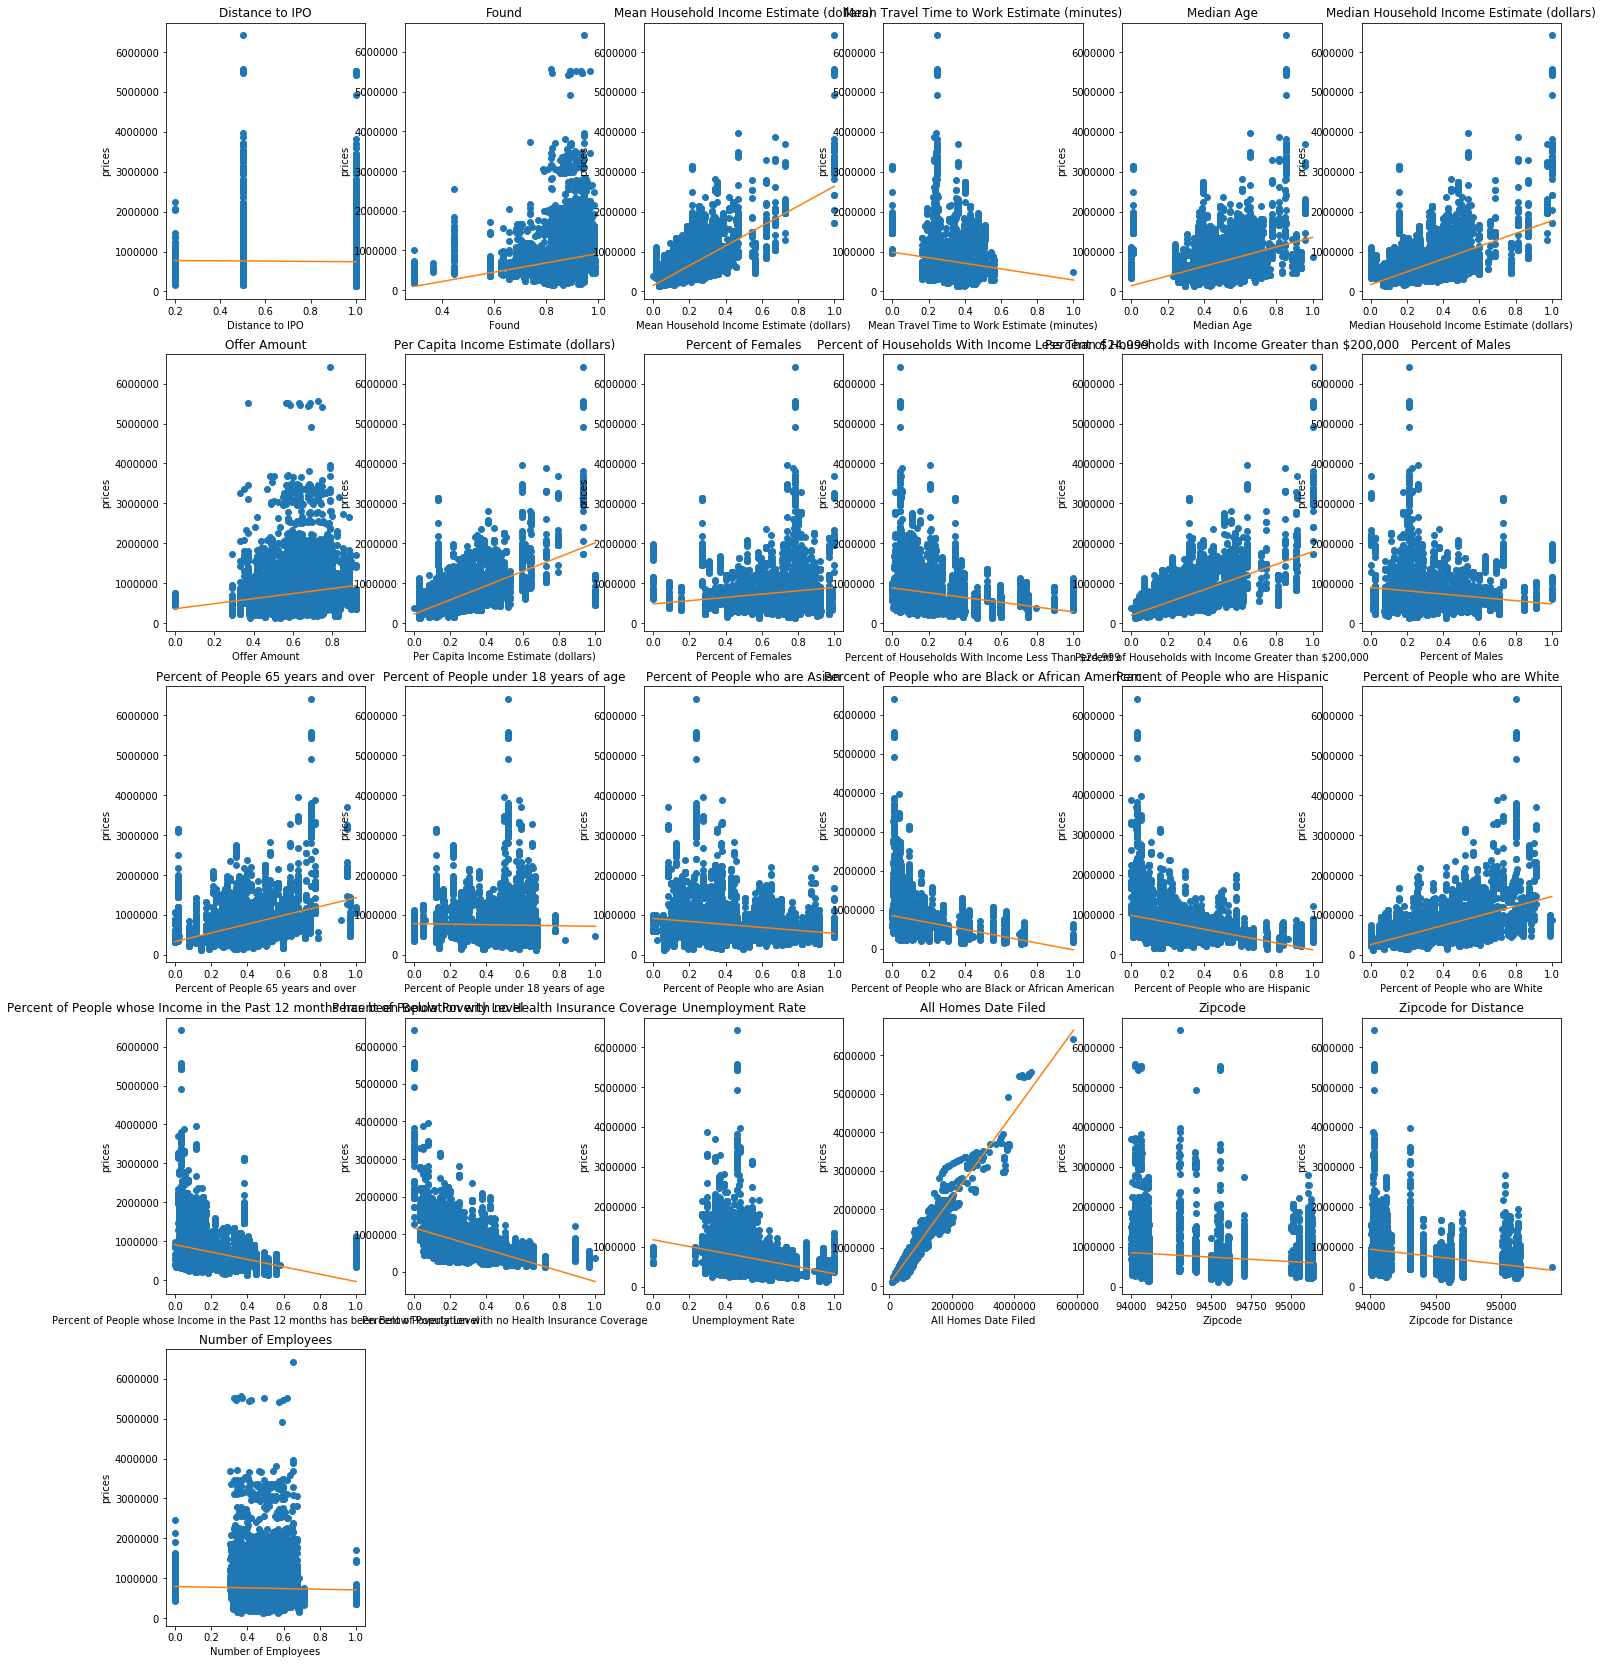

In [25]:
plt.figure(figsize=(25,60))
# i: index
for i,col in enumerate(feature_cols):
    # 3 plots here hence 1, 3
    plt.subplot(10, 6, i+1)
    x = df_train_set_2_years[col]
    y = df_train_set_2_years['All Homes 2 Years After Date Filed']
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

From this multivariate analysis All Homes 2 Years After Date Filed increases with Mean Household Income Estimate, Median Household Income Estimate, Per Capita Income Estimate, Households with Income Greater than $200,000 and All Homes Date Filed

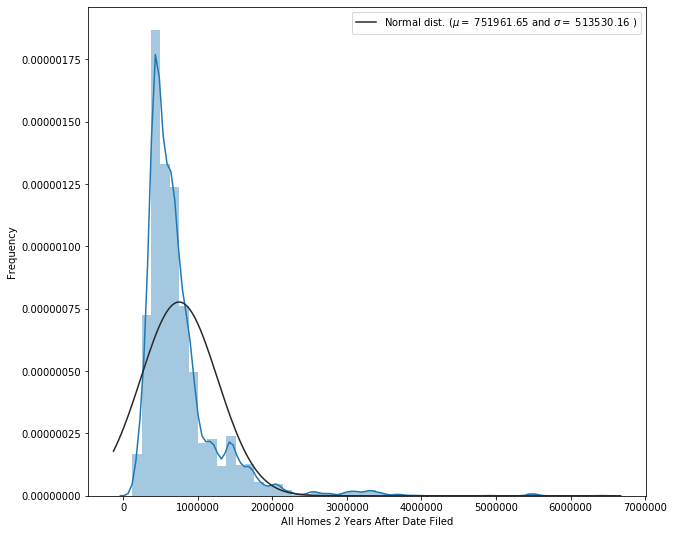

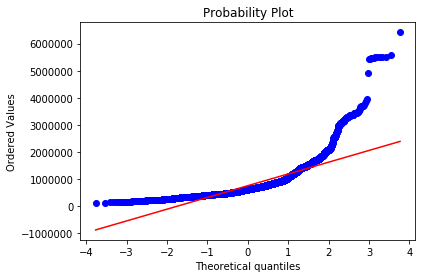

In [26]:
plt.subplots(figsize=(10,9))
sns.distplot(df_train_set_2_years['All Homes 2 Years After Date Filed'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df_train_set_2_years['All Homes 2 Years After Date Filed'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df_train_set_2_years['All Homes 2 Years After Date Filed'], plot=plt)
plt.show()



# Prepare Data

In [27]:
# Split-out validation dataset
X = df_train_set_2_years.loc[:, feature_cols]
y = df_train_set_2_years[label_col]

x_pred_test = df_test_set_2_years.loc[:, feature_cols]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare Machine Learning Algorithms

In [28]:
model = sm.OLS(Y_train,X_train)

In [29]:
results = model.fit()
print (results.summary())

                                    OLS Regression Results                                    
Dep. Variable:     All Homes 2 Years After Date Filed   R-squared:                       0.935
Model:                                            OLS   Adj. R-squared:                  0.935
Method:                                 Least Squares   F-statistic:                     4008.
Date:                                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                                        13:02:58   Log-Likelihood:                -88567.
No. Observations:                                6716   AIC:                         1.772e+05
Df Residuals:                                    6691   BIC:                         1.774e+05
Df Model:                                          24                                         
Covariance Type:                            nonrobust                                         
                                                  

Plot of the Fitted vs Residuals

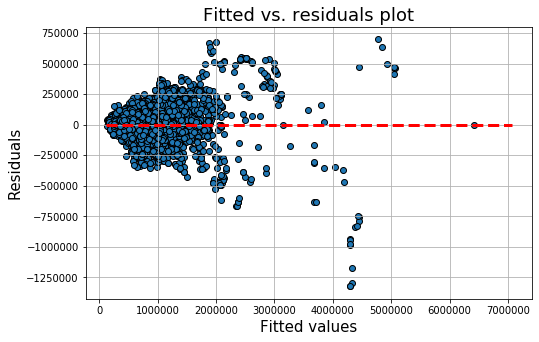

In [30]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=results.fittedvalues,y=results.resid,edgecolor='k')
xmin=min(results.fittedvalues)
xmax = max(results.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [31]:
# Test options and evaluation metric using Root Mean Square error method
num_folds = 20
seed = 7
RMS = 'neg_mean_squared_error'

In [32]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [33]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -16879956385.251627 (2931849558.145891)


/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53409840234077.92, tolerance: 164480666517.01508
  positive)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53732280601325.81, tolerance: 166603218934.79297
  positive)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53203306098700.48, tolerance: 163463588555.71707
  positive)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase 

LASSO: -16878670975.118006 (2930939930.989749)
EN: -20138905476.875893 (3763157277.687671)
KNN: -17082897970.607143 (3169938196.714369)
CART: -7687920041.377933 (3530146323.144910)


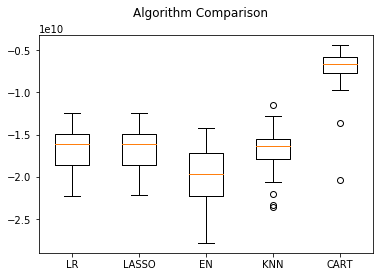

In [34]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [35]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: -16881016390.817072 (2906164380.842708)


/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2136306200395.0, tolerance: 164480666517.01508
  positive)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5691349950053.8125, tolerance: 166603218934.79297
  positive)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3879113344610.9844, tolerance: 163463588555.71707
  positive)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase 

ScaledLASSO: -16878993169.043253 (2930298076.800085)
ScaledKNN: -48304180422.281265 (9477130118.480024)
ScaledCART: -7857908706.312190 (3559178071.994094)


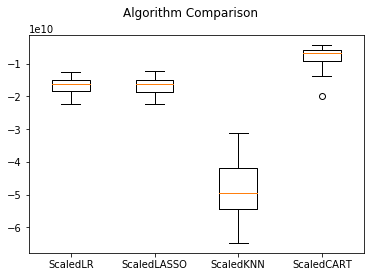

In [36]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Ensemble methods like CART are producing best results so I will now evaluate and hypertune different ensemble algorithms

In [37]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', MinMaxScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
df_train_set_2_years.shape

ScaledAB: -19796480602.936310 (2158613004.309821)
ScaledGBM: -8233154989.232732 (2191349809.198936)


/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaron/miniconda3/lib/python3.7/si

ScaledRF: -5263367347.403385 (2765713828.692882)


/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aaron/miniconda3/lib/python3.7/si

ScaledET: -5345022148.078625 (3427915588.459143)


(8396, 32)

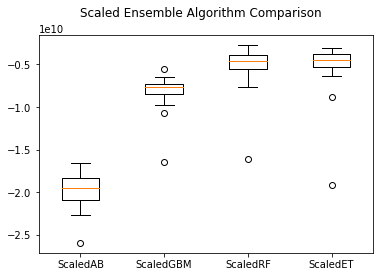

In [38]:
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


# Tune Extra Trees Regressor 

In [39]:
param_grid = dict(n_estimators=np.array([50,100,200]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/aaron/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -4297586025.235557 using {'n_estimators': 100}
-4322428341.054794 (2379577599.259717) with: {'n_estimators': 50}
-4297586025.235557 (2361292007.873243) with: {'n_estimators': 100}
-4324117002.112455 (2514775056.116859) with: {'n_estimators': 200}


In [40]:
# prepare the model

model = ExtraTreesRegressor(random_state=seed, n_estimators=100)
model.fit(X_train, Y_train)
# transform the validation dataset
predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))
print("Accuracy --> ", model.score(X_validation, Y_validation)*100)

# prepare the model

model_rf = RandomForestRegressor(random_state=seed, n_estimators=100)
model_rf.fit(X_train, Y_train)
# transform the validation dataset
predictions_rf = model_rf.predict(X_validation)
print(mean_squared_error(Y_validation, predictions_rf))
print("Accuracy --> ", model.score(X_validation, Y_validation)*100)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model_gb = ensemble.GradientBoostingRegressor(**params)
model_gb.fit(X_train, Y_train)
# transform the validation dataset
predictions_gb = model_gb.predict(X_validation)
print(mean_squared_error(Y_validation, predictions_gb))
print("Accuracy --> ", model.score(X_validation, Y_validation)*100)

2725173303.669048
Accuracy -->  99.06933022061844
3416300405.7208333
Accuracy -->  99.06933022061844
7332703756.102599
Accuracy -->  99.06933022061844


In [41]:
predictions=predictions.astype(int)
X_validation["Org House Price"] =Y_validation
X_validation["Pred House Price"] =predictions
X_validation["Pred House Price RF"] =predictions_rf
X_validation["Pred House Price GB"] =predictions_gb
X_validation["Pred House Price Change"] = predictions/Y_validation -1
X_validation["Pred House Price RF Change"] = predictions_rf/Y_validation -1
X_validation["Pred House Price GB Change"] = predictions_gb/Y_validation -1
 
'''
submission = pd.DataFrame({
        "Org House Price": Y_validation,
        "Pred House Price": predictions,
        "Pred House Price RF": predictions_rf,
        "Pred House Price GB": predictions_gb,
        "Pred House Price Change": predictions/Y_validation,
        "Pred House Price RF Change": predictions_rf/Y_validation,
        "Pred House Price GB Change": predictions_gb/Y_validation,
    
        
    })

'''

X_validation.to_csv("data/processed/Predictions.csv", index=False)
print(model_rf.feature_importances_)

/Users/aaron/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aaron/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aaron/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

[3.36946526e-04 5.38602251e-03 8.63456322e-03 4.24619648e-03
 1.04043534e-03 4.61867112e-03 2.37183721e-03 8.52050684e-03
 2.73081930e-03 1.09766014e-03 5.96931761e-03 2.95694353e-03
 1.69461062e-03 8.84603176e-04 1.38346970e-03 1.02099842e-03
 1.31385542e-03 1.32050494e-03 1.22294773e-03 2.34025261e-03
 1.10644977e-03 9.32479276e-01 2.48004683e-03 1.84074085e-03
 3.00232390e-03]


/Users/aaron/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aaron/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/aaron/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

Linear Regression

In [42]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [45]:
#Fit the model
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#Score/Accuracy
print("Linear Regression Accuracy --> ", model.score(X_test, y_test)*100)

NameError: name 'X_test' is not defined

Random Forest Regression

In [ ]:
#Train the model
model = RandomForestRegressor(n_estimators=50)

In [ ]:
#Fit
model.fit(X_train, Y_train)

In [ ]:
#Score/Accuracy
print("Random Forest Regression Accuracy --> ", model.score(X_validation, Y_validation)*100)

Gradient Boosted Trees Regression

In [ ]:
#Train the model
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [ ]:
#Fit
GBR.fit(X_train, y_train)

In [ ]:
print("Gradient Boosted Trees Accuracy --> ", GBR.score(X_test, y_test)*100)


Neural Network Regression

In [ ]:
model = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(22,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train,
          batch_size=16, epochs=10,
          validation_data=(X_test, y_test))

In [ ]:

export_csv = X_train.to_csv ('data/processed/df_test_pred_1.csv', index = True, header=True) #Don't forget to add '.csv' at the end of the path


In [47]:
 np.where(np.isnan(df_train_set_2_years))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [63]:
df_test_set_2_years

,All Homes 1 Year After Date Filed,All Homes 2 Years After Date Filed,All Homes Date Filed,All Homes Lockup Expiration Date,Date Filed,Distance to IPO,Found,Lockup Expiration Date,Mean Household Income Estimate (dollars),Mean Travel Time to Work Estimate (minutes),...,Percent of People who are Black or African American,Percent of People who are Hispanic,Percent of People who are White,Percent of People whose Income in the Past 12 months has been Below Poverty Level,Percent of Population with no Health Insurance Coverage,Symbol,Unemployment Rate,Zipcode,Zipcode for Distance,2 Year Home Value ratio
451,NaN,NaN,1644700.0,1617900.0,2018-06-22,0.2,0.969512,2018-12-19,0.354676,0.352113,...,0.038813,0.076687,0.459743,0.034274,0.055866,ALLK,0.425926,94065,94065,NaN
452,NaN,NaN,1604300.0,1559100.0,2018-06-22,0.5,0.969512,2018-12-19,0.293464,0.384977,...,0.045662,0.041411,0.444574,0.038306,0.083799,ALLK,0.407407,94065,94404,NaN
453,NaN,NaN,1855100.0,1904800.0,2018-06-22,0.5,0.969512,2018-12-19,0.388923,0.335681,...,0.009132,0.108896,0.784131,0.022177,0.122905,ALLK,0.444444,94065,94070,NaN
454,NaN,NaN,1764600.0,1776900.0,2018-06-22,0.5,0.969512,2018-12-19,0.306819,0.342723,...,0.022831,0.133436,0.613769,0.054435,0.117318,ALLK,0.444444,94065,94002,NaN
455,NaN,NaN,1244600.0,1255300.0,2018-06-22,0.5,0.969512,2018-12-19,0.093738,0.232394,...,0.059361,1.000000,0.184364,0.346774,0.888268,ALLK,0.444444,94065,94063,NaN
456,NaN,NaN,1551400.0,1538800.0,2018-06-22,0.5,0.969512,2018-12-19,0.246714,0.319249,...,0.036530,0.265337,0.499417,0.084677,0.223464,ALLK,0.379630,94065,94403,NaN
457,NaN,NaN,1985200.0,1973900.0,2018-06-22,0.5,0.969512,2018-12-19,0.363580,0.333333,...,0.034247,0.167178,0.623104,0.054435,0.122905,ALLK,0.287037,94065,94402,NaN
458,NaN,NaN,1125800.0,1171400.0,2018-06-22,0.5,0.969512,2018-12-19,0.148290,0.295775,...,0.070776,0.555215,0.337223,0.213710,0.469274,ALLK,0.425926,94065,94401,NaN
459,NaN,NaN,1625400.0,1645900.0,2018-06-22,0.5,0.969512,2018-12-19,0.214558,0.220657,...,0.031963,0.503067,0.549592,0.100806,0.368715,ALLK,0.361111,94065,94061,NaN
460,NaN,NaN,6588500.0,6589300.0,2018-06-22,1.0,0.969512,2018-12-19,1.000000,0.244131,...,0.006849,0.030675,0.805134,0.032258,0.000000,ALLK,0.462963,94065,94027,NaN
